# Question 2: Social Network Analysis with Facebook100 Dataset

Analyse de trois réseaux universitaires:
- **Caltech** (762 nœuds dans la LCC)
- **MIT** (6402 nœuds dans la LCC)
- **Johns Hopkins** (5157 nœuds dans la LCC)

## Import des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path

from utils import (
    load_facebook_network,
    get_largest_connected_component,
    compute_basic_stats,
    compute_degree_distribution,
    compute_clustering_metrics,
    get_degree_clustering_data
)

# Configuration matplotlib
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 10

## Chargement des données

In [2]:
data_dir = Path("data")

networks = {
    'Caltech': data_dir / 'Caltech36.gml',
    'MIT': data_dir / 'MIT8.gml',
    'Johns Hopkins': data_dir / 'Johns Hopkins55.gml'
}

graphs = {}

for name, filepath in networks.items():
    G = load_facebook_network(filepath)
    
    G_lcc = get_largest_connected_component(G)
    
    print(f"  Graphe original: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")
    print(f"  LCC: {G_lcc.number_of_nodes()} nœuds, {G_lcc.number_of_edges()} arêtes\n")
    
    graphs[name] = G_lcc

  Graphe original: 769 nœuds, 16656 arêtes
  LCC: 762 nœuds, 16651 arêtes

  Graphe original: 6440 nœuds, 251252 arêtes
  LCC: 6402 nœuds, 251230 arêtes

  Graphe original: 5180 nœuds, 186586 arêtes
  LCC: 5157 nœuds, 186572 arêtes



## Question 2(a): Distribution des degrés

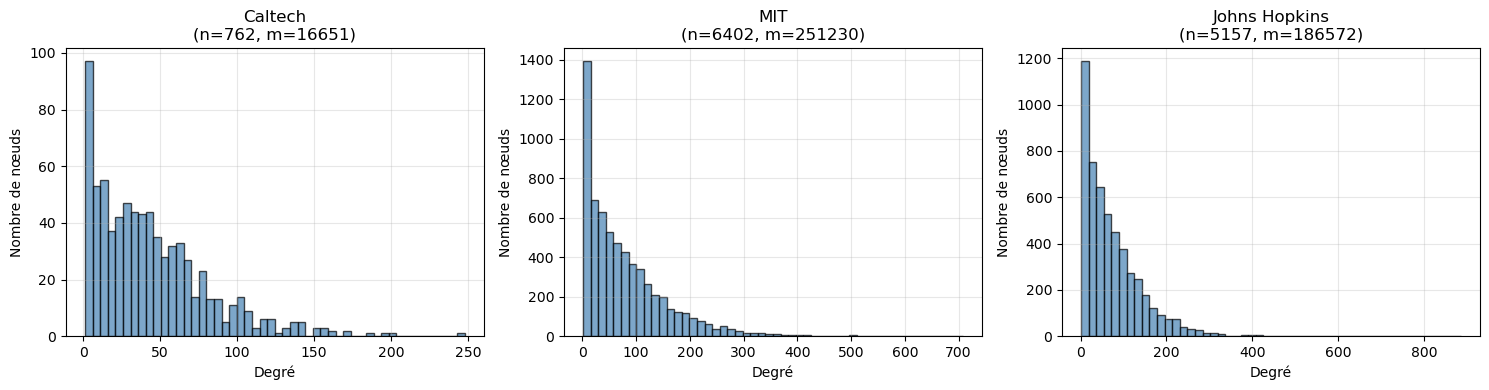

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, G) in enumerate(graphs.items()):
    degrees, degree_counts = compute_degree_distribution(G)
    
    ax = axes[idx]
    ax.hist(degrees, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.set_xlabel('Degré')
    ax.set_ylabel('Nombre de nœuds')
    ax.set_title(f'{name}\n(n={G.number_of_nodes()}, m={G.number_of_edges()})')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outputs/question2/degree_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 2(b): Clustering et densité

Calcul des métriques:
- **Densité**: proportion d'arêtes existantes par rapport au maximum possible
- **Clustering global** (transitivité): proportion de triangles fermés
- **Clustering local moyen**: moyenne des coefficients locaux

In [4]:
results = []

for name, G in graphs.items():
    print(f"Traitement de {name}...")
    
    stats = compute_basic_stats(G)
    clustering = compute_clustering_metrics(G)
    
    result = {
        'Réseau': name,
        'Nœuds': stats['num_nodes'],
        'Arêtes': stats['num_edges'],
        'Densité': stats['density'],
        'Degré moyen': stats['avg_degree'],
        'C_global': clustering['global_clustering'],
        'C_local_mean': clustering['mean_local_clustering']
    }
    results.append(result)

Traitement de Caltech...
Traitement de MIT...
Traitement de Johns Hopkins...


In [5]:
df_metrics = pd.DataFrame(results)

print("tableau :")
print(df_metrics.to_string(index=False))

df_metrics.to_csv('outputs/question2/clustering_metrics.csv', index=False)

tableau :
       Réseau  Nœuds  Arêtes  Densité  Degré moyen  C_global  C_local_mean
      Caltech    762   16651 0.057429    43.703412  0.291281      0.409117
          MIT   6402  251230 0.012261    78.484848  0.180288      0.272360
Johns Hopkins   5157  186572 0.014034    72.356797  0.193161      0.269008


## Question 2(c): Degré vs Clustering local

Scatter plots pour visualiser la relation entre le degré d'un nœud et son coefficient de clustering local.

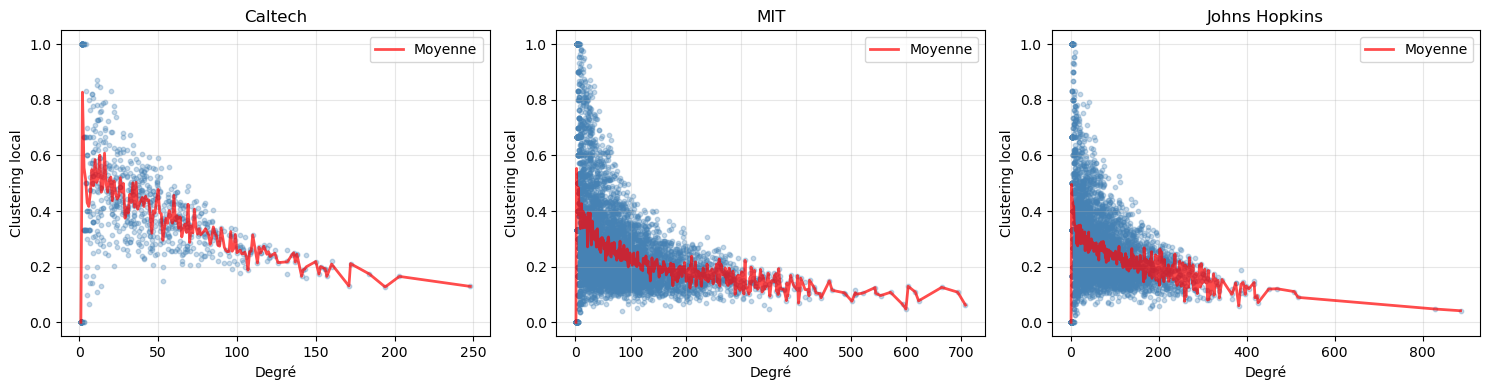

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, G) in enumerate(graphs.items()):
    degrees, clusterings = get_degree_clustering_data(G)
    
    ax = axes[idx]
    ax.scatter(degrees, clusterings, alpha=0.3, s=10, color='steelblue')
    ax.set_xlabel('Degré')
    ax.set_ylabel('Clustering local')
    ax.set_title(f'{name}')
    ax.grid(True, alpha=0.3)
    
    unique_degrees = sorted(set(degrees))
    avg_clustering = []
    
    for k in unique_degrees:
        clusterings_k = [c for d, c in zip(degrees, clusterings) if d == k]
        if clusterings_k:
            avg_clustering.append(np.mean(clusterings_k))
        else:
            avg_clustering.append(0)
    
    ax.plot(unique_degrees, avg_clustering, 'r-', linewidth=2, alpha=0.7, label='Moyenne')
    ax.legend()

plt.tight_layout()
plt.savefig('outputs/question2/degree_vs_clustering.png', dpi=300, bbox_inches='tight')
plt.show()